## Histo-Scatter-Area Plot, with randomer

Inspired by a chart seen on the Bloomberg News website and a visit to the Danish Design Museum in Copenhagen, this cross between a histrogram, a scatterplot and a filled area chart is ideal for visualising a change in a series of values over two points in time, especially where they skew positively and negatively in an oppossing manner. 

The x axis represents the change in value (as a percent) that a percentile/bin has experienced.

The y axis represents the "original share" of each percentile - in other words, its proportion of the original sum of values. 

Rectangeles that skew negative are denoted by red, and those that are positive with green.

For illustrative purposes, this version includes functions to create a dataframe of random values.

I have used this HSA Plot, for example, to illustrate changes in airport traffic changes during the pandemic for airports in different percentiles. This showed audiences that many smaller airports had experienced an uptick in traffic at the same time as major airports had experienced a down turn.

In [469]:
### Notes ###
# The index_length variable determines the number of points in the dataframe/chart. It must be above 2.

In [470]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import random
from random import random
from random import randint

In [471]:
### These three functions create a dataframe of random values with which to test the plot function

def randomXs(index_length):
    
    ### The x axis represents each bin's cahnge in value from its original value. This function creates a series of random x values.     

    index_length = 2 if index_length < 2 else index_length
    
    ### This chart works best when it has both negative and positive values. 
    ### The midpt variable determines how many of the required values will be above or below zero.
    ### The midpoint is set to be between 20 and 80 percent mark of values (eg somewhere between 2 and 8 when 10 values are required.)

    midpt = randint(int(index_length * 0.2), int(index_length * 0.8)) if index_length > 4 else randint(1, index_length-1)
        
    random_xs_negative = [randint(-100,0) for x in range(0,midpt)] 
    random_xs_positive = [randint(0,200) for x in range(midpt,index_length)]
    random_xs = sorted(random_xs_negative + random_xs_positive)
        
    return random_xs

def randomYs(index_length, shuffled):
    
    ### The y axis represents each bin's "original share" of the total value. This function creates a series of random y values that equal to 100.     
    ### All values are positive. 
    
    random_ys = [randint(1, 100) for x in range(1,index_length+1)]
    random_ys = [x/sum(random_ys) * 100 for x in random_ys]
                  
    if shuffled == True:
        random.shuffle(random_ys)
        
    random_ys[-1] = random_ys[-1] + (100 - sum(random_ys)) ### to deal with 99.9999 and 100.00001 sums
                    
    return random_ys

def getDF(index_length):
    
    # Compiles a dataframe of the random values, with rgb color values

    df = pd.DataFrame(index = [x for x in range(0, index_length)], columns = ['x', 'y', 'r', 'g', 'b'])
    df['x'] = randomXs(index_length)
    df['y'] = randomYs(index_length, False)
    #df['r'] = np.where(df['x'] < 0, 178, 34)
    #df['g'] = np.where(df['x'] < 0, 34, 255)
    #df['b'] = 34
    
    return df

In [475]:
def plotHSA(df, title):
        
    #assign colors based on x value being positive or negative
    
    df['r'] = np.where(df['x'] < 0, 178 - df['x'], 34)
    df['g'] = np.where(df['x'] < 0, 34, 178 + df['x'])
    df['b'] = 34
    
    #### 
    
    fig = go.Figure()

    for index, row in df.iterrows():

        fig.add_shape(type="rect", x0=0, y0=0, x1=row['x'], y1=row['y'],
            line=dict(color=f'rgba({row["r"]}, {row["g"]}, {row["b"]}, 1)', width=1),
            fillcolor=f'rgba({row["r"]}, {row["g"]}, {row["b"]}, 0.075)',
        )

    fig.update_layout(
        title={
            'text': f"<span style='font-size: 24px'><b>{title}</b></span><br style='line-height: 0.5'><span style='font-weight: 100; font-size: 16px; line-height: 0.5'>{df.shape[0]} percentiles</span>",
            'y':0.95, 'x':0, 'xanchor': 'left',  'yanchor': 'top',
            'font_family': 'Inter, Arial, Helvetica, Sans-serif', 'font_size': 16,})

    fig.add_vline(x=0, line_width=2, line_dash="solid", line_color="rgba(22,22,22,0.66)")

    fig.update_layout(
        height=400, width=800, 
        margin=dict(l=0, r=30, t=60, b=0),
        plot_bgcolor='rgba(255,255,255,1)', paper_bgcolor=None
    )

    fig.update_layout(showlegend=False)

    fig.update_xaxes(range=[df['x'].min() - 1 , df['x'].max() + 1], showgrid=False)
    fig.update_yaxes(range=[0, df['y'].max() + 1])

    fig.update_layout(
        xaxis_title="Percentage change", yaxis_title="Original share (%)",
        font=dict( family="Inter",  size=12,  color="#181818")
    )

    fig.show()

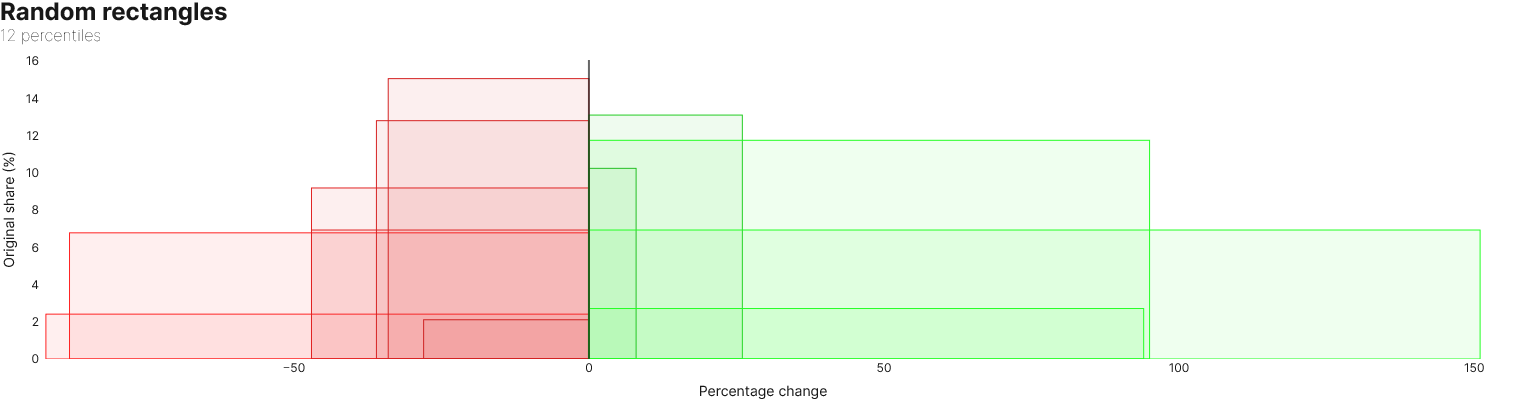

In [476]:
plotHSA(getDF(12), 'Random rectangles')

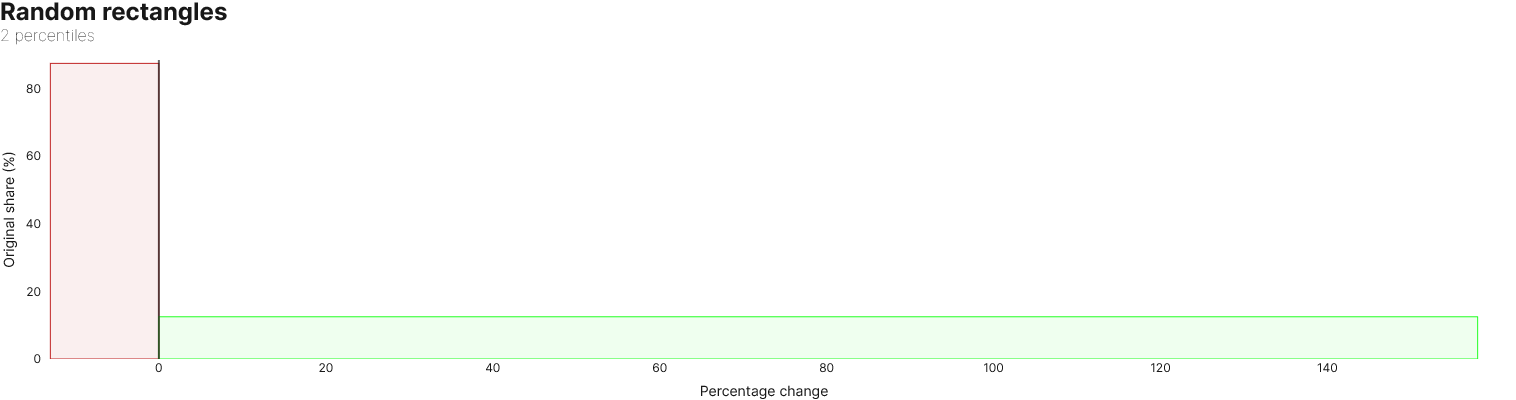

In [489]:
plotHSA(getDF(2), 'Random rectangles')

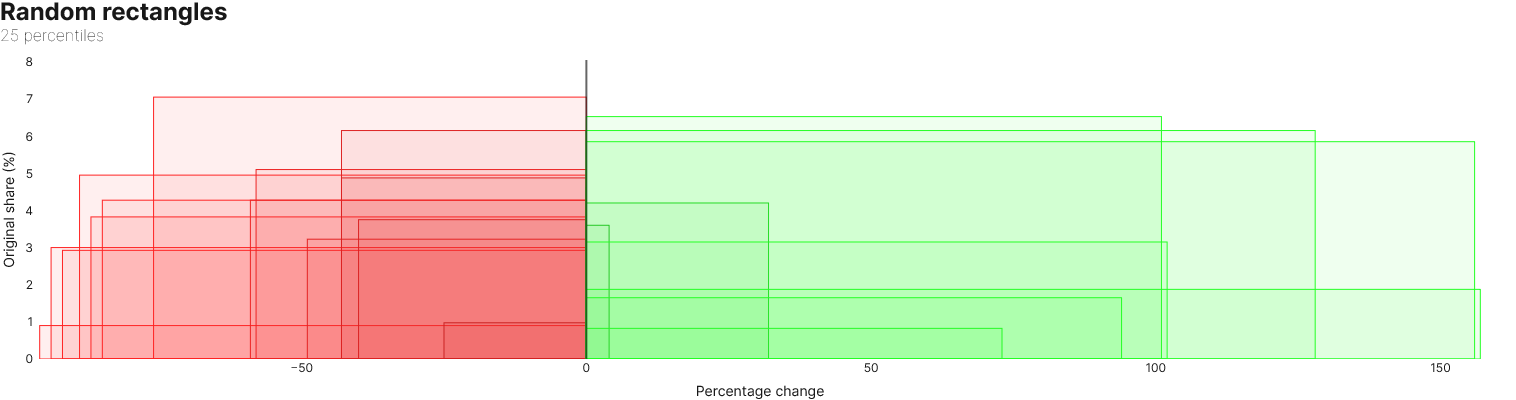

In [481]:
plotHSA(getDF(25), 'Random rectangles')

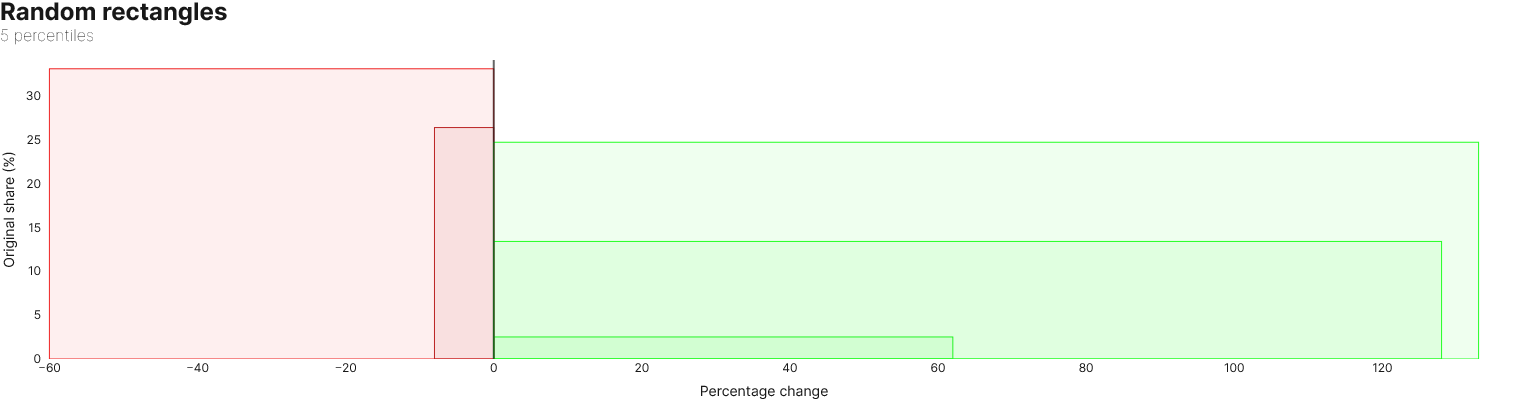

In [480]:
plotHSA(getDF(5), 'Random rectangles')